# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [9]:
DATA_FOLDER = '/Users/tomtom/GoogleDrive/EPFL/Master/MA3/Applied_Data/ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [10]:
# Write your answer here
#first We need to import the data as a dataframe of course it means importing pandas
#create a unique dataframe with country:date::

In [11]:
import pandas as pd
import numpy as np
from IPython.display import display
import glob
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse

In [12]:
##Create a column with name of the country in the beginning of the frame
def add_pays(data_frame, pays):
    data_frame.loc[:,'Pays'] = pd.Series(pays, index=data_frame.index)
    cols = list(data_frame)
    cols.insert(0, cols.pop(cols.index('Pays')))
    data_frame = data_frame.loc[:, cols]
    return data_frame

#import the csv files of one country and put them in one frame
def create_oneframe(pays):
    allFiles = glob.glob(DATA_FOLDER + "/ebola/%s_data/*.csv"%pays)
    list_ = []
    frame=pd.DataFrame()
    for file_ in allFiles:
        df = pd.read_csv(file_)
        if not frame.empty:
            frame = pd.merge(frame, df, how='outer')
        else :
            frame = df
    return frame

In [13]:
pays1='guinea'
pays2='liberia'
pays3='sl'   #Sierra Leone

##créer une colonne total pour les pays qui ont en pas guinea:Totals, liberia:National

guinea=add_pays(create_oneframe(pays1),(pays1))
liberia=add_pays(create_oneframe(pays2),(pays2))
sl=add_pays(create_oneframe(pays3),(pays3))
display(liberia)

,Pays,Date,Variable,National,Bomi County,Bong County,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,Nimba County,River Gee County,RiverCess County,Sinoe County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Unnamed: 18
0,liberia,6/16/2014,Specimens collected,1.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,liberia,6/16/2014,Specimens pending for testing,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,liberia,6/16/2014,Total specimens tested,28.0,NaN,NaN,NaN,21.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,liberia,6/16/2014,Newly reported deaths,2.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,liberia,6/16/2014,Total death/s in confirmed cases,8.0,NaN,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,liberia,6/16/2014,Total death/s in probable cases,6.0,NaN,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,liberia,6/16/2014,Total death/s in suspected cases,2.0,NaN,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,liberia,6/16/2014,"Total death/s in confirmed, probable, suspecte...",16.0,NaN,NaN,NaN,8.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,liberia,6/16/2014,Case Fatality Rate (CFR) - Confirmed & Probabl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,liberia,6/16/2014,Newly reported contacts,41.0,NaN,NaN,NaN,41.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
all_country=pd.DataFrame()
all_country=pd.merge(sl,guinea,how='outer')
all_country=pd.merge(all_country,liberia,how='outer')

#all_country=all_country.fillna('')
all_country["Description"] = all_country["Description"].fillna('').map(str) + all_country["Variable"].fillna('').map(str)+all_country["variable"].fillna('').map(str)
all_country["Date"] = all_country["Date"].fillna('').map(str) + all_country["date"].fillna('').map(str)
all_country['National']=all_country['National'].fillna('').map(str)+all_country['Totals'].fillna('').map(str)

#TODO: search for missing values in National: if empty sum following columns

#or delete those rows 
Natio_empty=np.where((all_country.National==''))[0]
all_country.drop(all_country.index[Natio_empty],inplace=True)


cols = list(all_country)
cols.pop(cols.index('Variable'))
cols.pop(cols.index('variable'))
cols.pop(cols.index('date'))
cols.pop(cols.index('Totals'))
cols.insert(1, cols.pop(cols.index('Date')))
cols.insert(2, cols.pop(cols.index('Description')))
cols.insert(3, cols.pop(cols.index('National')))
all_country = all_country.loc[:, cols]


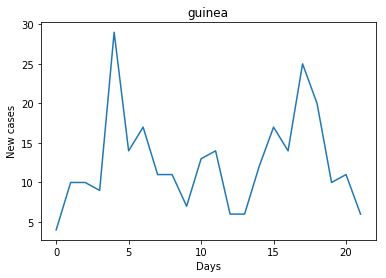

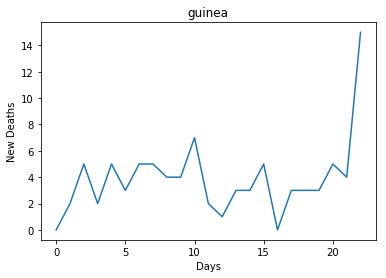

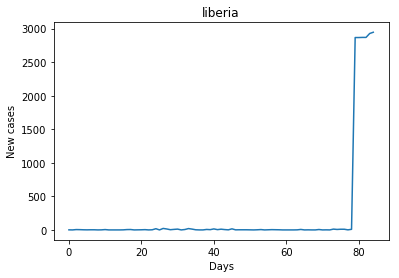

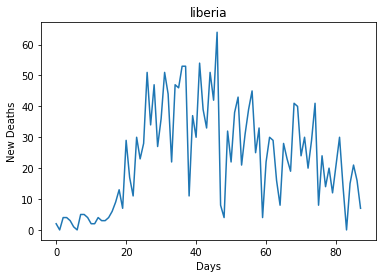

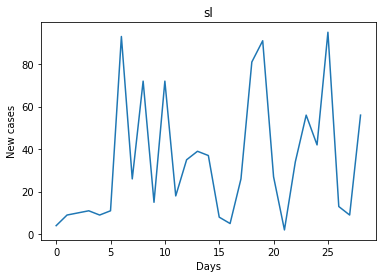

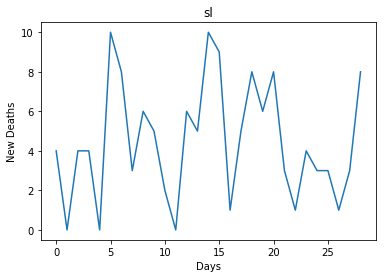

New cases average:{'liberia': 207.76470588235293, 'sl': 46.084210526315786, 'guinea': 12.545454545454545}
death average:{'liberia': 23.15909090909091, 'sl': 4.482758620689655, 'guinea': 3.869565217391304}


In [15]:
countries=['guinea','liberia','sl']
death_dict={}
newcase_dict={}

for country in countries:

    one_country=all_country[all_country.Pays.str.startswith(country)]

    #frame with only rows of new cases confirmed:
    country_new=one_country[one_country.Description.str.contains('New',case=False)& (one_country.Description.str.contains('confirmed'))\
                             &(~one_country.Description.str.contains('Death',case=False))&(~one_country.Description.str.contains('workers',case=False))]
    #display(country_new)
    #average over the columns
    #news cases confirmed daily average over the year
    newcase_dict[country]=(country_new.National.astype(float).mean())
    #frame with only rows of death cases confirmed:
    country_death=one_country[one_country.Description.str.contains('deaths',case=False) & ~(one_country.Description.str.contains('HCW'))\
                             &(one_country.Description.str.contains('new',case=False)) &~(one_country.Description.str.contains('proba'))\
                             &~(one_country.Description.str.contains('workers'))&~(one_country.Description.str.contains('confirmed'))]
    
    #display(country_death)
    #daily death average over year :
    death_dict[country]=(country_death.National.astype(float).mean())
    
    
    ###plot of the new cases:
    date=country_death.Date.tolist()
    date=[parse(x) for x in date]
    newcase=country_new.National.astype(float).tolist()
    date, newcase = zip(*sorted(zip(date, newcase)))

    plt.plot(newcase)
    plt.title(country)
    plt.xlabel('Days')
    plt.ylabel('New cases')
    plt.show()
    
    
    ###plot of the death everyday (in increasing date)
    date=country_death.Date.tolist()
    date=[parse(x) for x in date]
    death=country_death.National.astype(float).tolist()
    date, death = zip(*sorted(zip(date, death)))
    
    plt.plot(death)
    plt.title(country)
    plt.xlabel('Days')
    plt.ylabel('New Deaths')
    plt.show()
    

    
##TO DO : get the average death(daily) per year
## and get the daily number of death to plot: newcases and death /daily for the year

print('New cases average:%s'%newcase_dict)
print('death average:%s'%death_dict)






In [ ]:
##sl : death : etc_new_deaths   // death_confirmed
##lib : death: Newly reported deaths   // Total death/s in confirmed cases
##guin: death: New deaths registered  // Total deaths of confirmed

##sl : death : etc_new_deaths   // death_confirmed
##lib : death: Newly reported deaths   // Total death/s in confirmed cases
##guin: death: New deaths registered  // Total deaths of confirmed

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Write your answer here